# Data Visualisation - Lab 4 - Text Analysis

---

**Authors: Claire Rocks, Richard Kirk and Saif Anwar**

---

## Setup for the lab

Welcome to the fourth lab for Data Visualisation.

In this lab we are going to look in more depth at visualising text files.

We will need a number of libraries. Some of these you would have seen before (such as ```numpy``` and ```pandas```), but some of these will be new. The main one we will be using is ```wordcloud```, which is a package used to generate a word cloud given certain constraints (which we will cover later). Each of the libraries we will be using are described here
* `numpy` - Numerical functions
* `pandas` - data analysis
* `scipy` - required by the `wordcloud` library; adds scientific calculation functions
* `matplotlib` - basic graphics
* `pillow` - wrapper for Python Imaging Library
* `wordcloud` - generates basic word clouds

In [11]:
# %pip install numpy pandas scipy matplotlib pillow wordcloud
%pip install wordcloud networkx

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Generating a basic word cloud
A word cloud is a visualisation of the most common words in a given string, where the frequency of the word is represented by its size. To best represent this visualisation, lets use an example! IMDb is a database full of films and TV, including relevant information and reviews. However, there are usually so many reviews that it is hard to gauge the overall opinion just by reading through them. Thus, a word cloud would be useful to see the overall sentiment and what is being discussed.

### Loading in the dataset
First of all, lets get some data! Whilst we could use data scrapping techniques as covered in a previous lab, this would be time consuming and IMDb limits how much data can be gained in this manner. We could use IMDb's API, but it costs **a lot** of money (like, a ridiculous amount as seen [here](https://aws.amazon.com/marketplace/search/results?FULFILLMENT_OPTION_TYPE=DATA_EXCHANGE&CREATOR=0af153a3-339f-48c2-8b42-3b9fa26d3367&DATA_AVAILABLE_THROUGH=API_GATEWAY_APIS&filters=FULFILLMENT_OPTION_TYPE%2CCREATOR%2CDATA_AVAILABLE_THROUGH)). Fortunately, other people have collected relevant datasets, including IMDb reviews. We have provide a small subset of this data, in a text file called [imdb.txt](imdb.txt). This had been generated from a library called `datasets`. This package contains a huge number of datasets for a number of different machine learning and artificial intelligence uses. The package even splits the data into into training and testing sets.

The code below loads in the IMDb dataset, and gets the text of the 1,000 reviews. To open the file we use the built in `open()` function, which has a `read()` method for reading the content of the file. `read()` returns the whole text but you can also use the following commands if you need to be more specific or need to it in a particular structure:
  * `readline()` to return one line
  * `readlines()` which returns a list where each line is an item in the list object.

In [12]:
## Import the data set
f = open("imdb.txt", "r")
rawdata = f.readlines()

### The ```WordCloud``` package
Because Python is so widely used by the machine learning and visualisation community, a package has been developed that can generate a word cloud for you. This doesn't mean that mean that it will be good, as it will need constraints. To have a look at all the things the library can take as parameters, we can query the key function ```WordCloud```. As you will see, there are a lot of different parameters that can be utilised. We will be covering a few of these, but it might be worth playing with these later on!

In [13]:
## Lets have a look at what the WordCloud function does...
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

### Generating your first word cloud
The ```WordCloud``` object has a handy function called ```generate```, which takes a string and uses the parameters specified in the ```WordCloud``` object. We will get into some of these later, and these are all listed in the previous code block.

Once the word cloud has been generated, we can plot it using ```matplotlib```. Because it uses the same library we have seen in previous labs and modules, we can use the same functions.

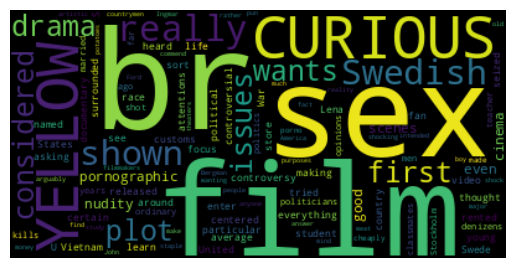

In [14]:
## Generate a word cloud object based on the first entry in the data
wordcloud = WordCloud().generate(rawdata[0])

## Plot the word cloud using matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Using all the data
In the previous code block, we only used the first element of data, ```rawdata[0]```, which was a single review. Whilst useful, it would be better if we could see trends across all of the reviews (especially when you consider that a single review is rather short). To generate this data, we can join (concatenate) all of the reviews together, and put a space between each one. We can then use this new data set to generate a new word cloud, in the same way we did before.

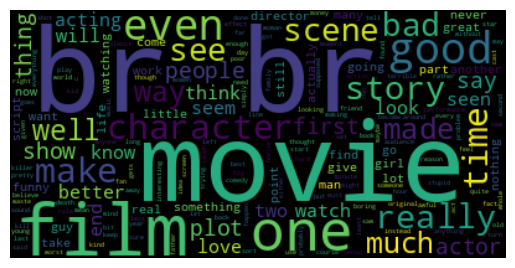

In [15]:
## Concatenate all the data together
data = " ".join(text for text in rawdata)

## Generate a new word cloud with all the data, rather than just the first result
wordcloud = WordCloud().generate(data)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Refining the word cloud
Whilst a good start, we can see that there are some odd results. For example, the word *film* and *movie* will appear a lot in reviews about films and movies. As such, we probably shouldn't consider these. Also, because the reviews are written in HTML, the tag ```br``` is used often. We should take these out as well. These words are referred to as **stop words**. The ```WordCloud``` library has a large collection of stop words built in, containing words like *a* and *the*. All we need to do is add these new words to the stop word set, and use this new and improved stop word set.

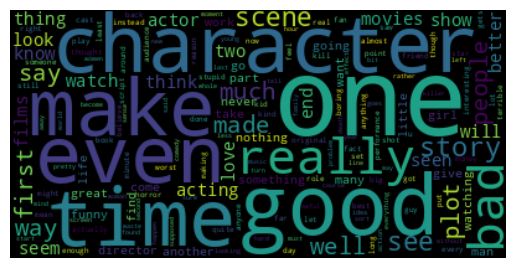

In [16]:
## Update the list of stopwords
newStopwords = set(STOPWORDS)
newStopwords.update(["br", "film", "movie"])

## Generate the new word cloud with the new list of stopwords
wordcloud = WordCloud(stopwords=newStopwords).generate(data)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Altering the word cloud's appearance
Now that the word cloud is working as it is expected, we can refine it! The ```WordCloud``` object has lots of parameters that can be utilised, all of which can be seen in one of the above code blocks. For this particular word cloud, we will make the background a different colour, increase the resolution, increase the number of words shown, and make the preview larger.

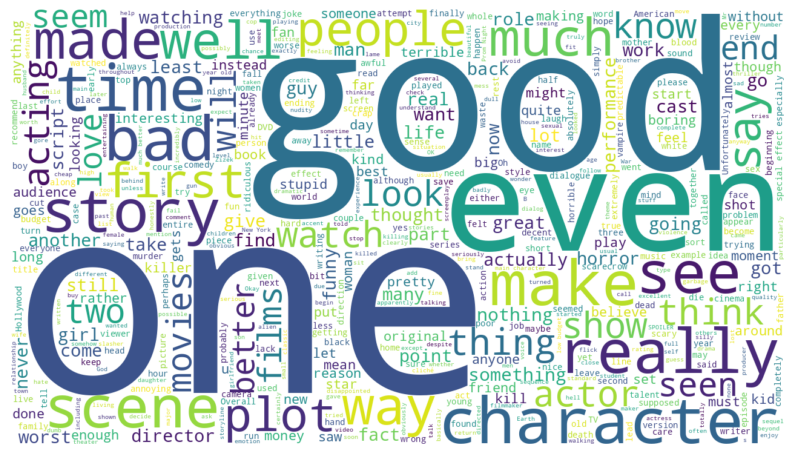

In [17]:
## Generate a word cloud with custom stopwords, colours, sizes and max number of words
wordcloud = WordCloud(stopwords=newStopwords, background_color="white", width=1280, height=720, max_words=500).generate(data)
plt.figure(figsize=[10,10]) #This alters the size of the preview...
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Generating an advanced word cloud
Our word clouds are great, but so far we've only had them form a rectangular shape, but we could mould the word cloud into a shape that is relevant to whatever we're trying to show with our visulisation. For example, a word cloud of news headlings in the shape of the word **NEWS**, or we could put movie review into the shape of a projector.

... In fact, lets do that last one!

### Downloading and setting up an image to utilise
Lets start by finding and downloading an image we can use as a basis for our new and improved word cloud. For this, we need to install a new library, ```requests```. This will allow us to make external ... requests ... from a given URL. We can then use a Python built-in IO library to correctly interpret the contents and set it to a black-and-white image.

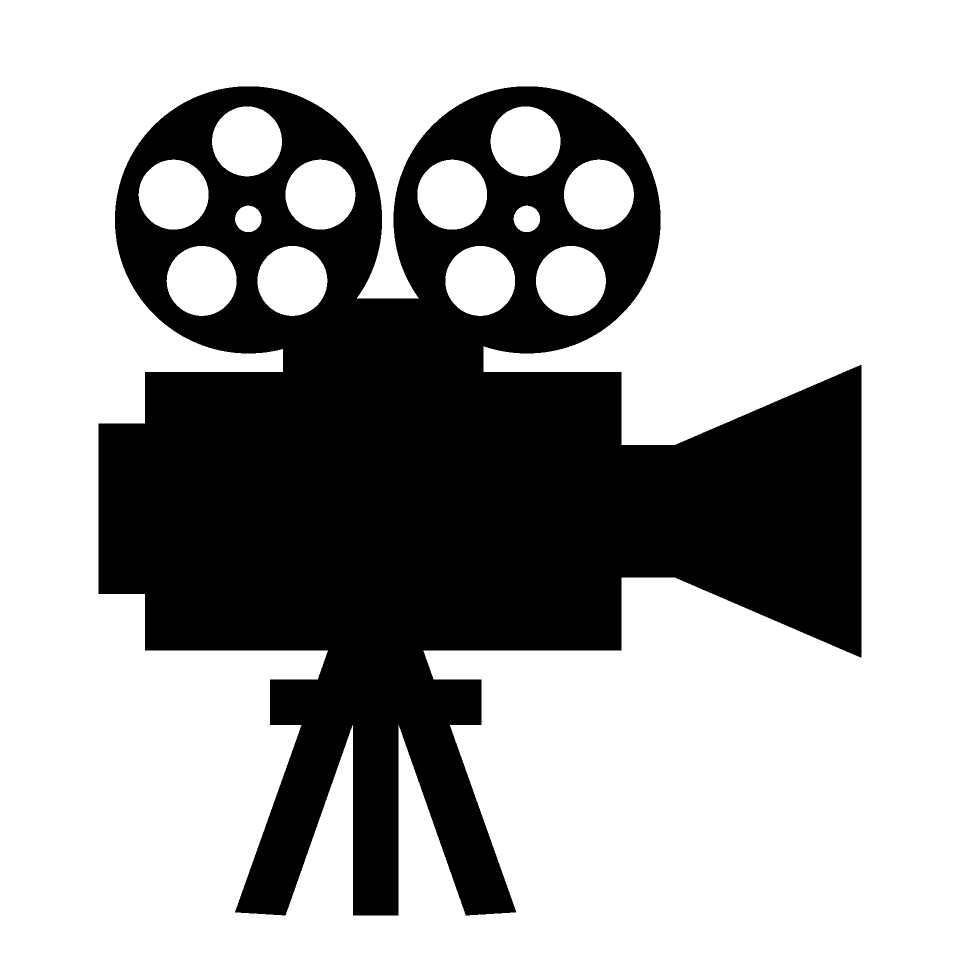

In [19]:
## Install and import some libraries for connecting to the internet
# %pip install requests
import requests
from io import BytesIO

## Lets download a cool image...
response = requests.get("https://illustoon.com/photo/dl/5003.png")

## Open the image and store as a black and white image
img = Image.open(BytesIO(response.content)).convert('RGBA') #If your image is not RGB with transparency, this may need to be changed...
img = Image.alpha_composite(Image.new('RGBA', img.size, (255, 255, 255)), img).convert("L")
img

### Setting up the mask

Now that we have our image, and we have made it black-and-white (using the `convert("L")` function in the previous code block), we now need to form a mask. A mask defines what can and can't be part of the word cloud. This can be generated using numpy's `array` function. Ths converts the image into a 2D array of values between 0 and 255, where 0 is black and 255 is white. All those values that are 0 will be used for the mask. As such, we can invert the mask by simply taking the current mask values away from 255. We can also form a mask using a threshold values... 

In [20]:
## Setup an masking of 1's and 0's
mask = np.array(img)
print(mask.shape)

## Uncomment if you want to invert the mask
#for i in range(len(mask)):
#    for j in range(len(mask[i])):
#            mask[i][j] = 255-mask[i][j]

## Uncomment if you want to see the what the mask looks like
#print(mask)

(960, 960)


### Generating the marketing image

We now have a mask all set up, and we know how to generate and customize our word cloud. Therefore, lets put it all together and see the result!

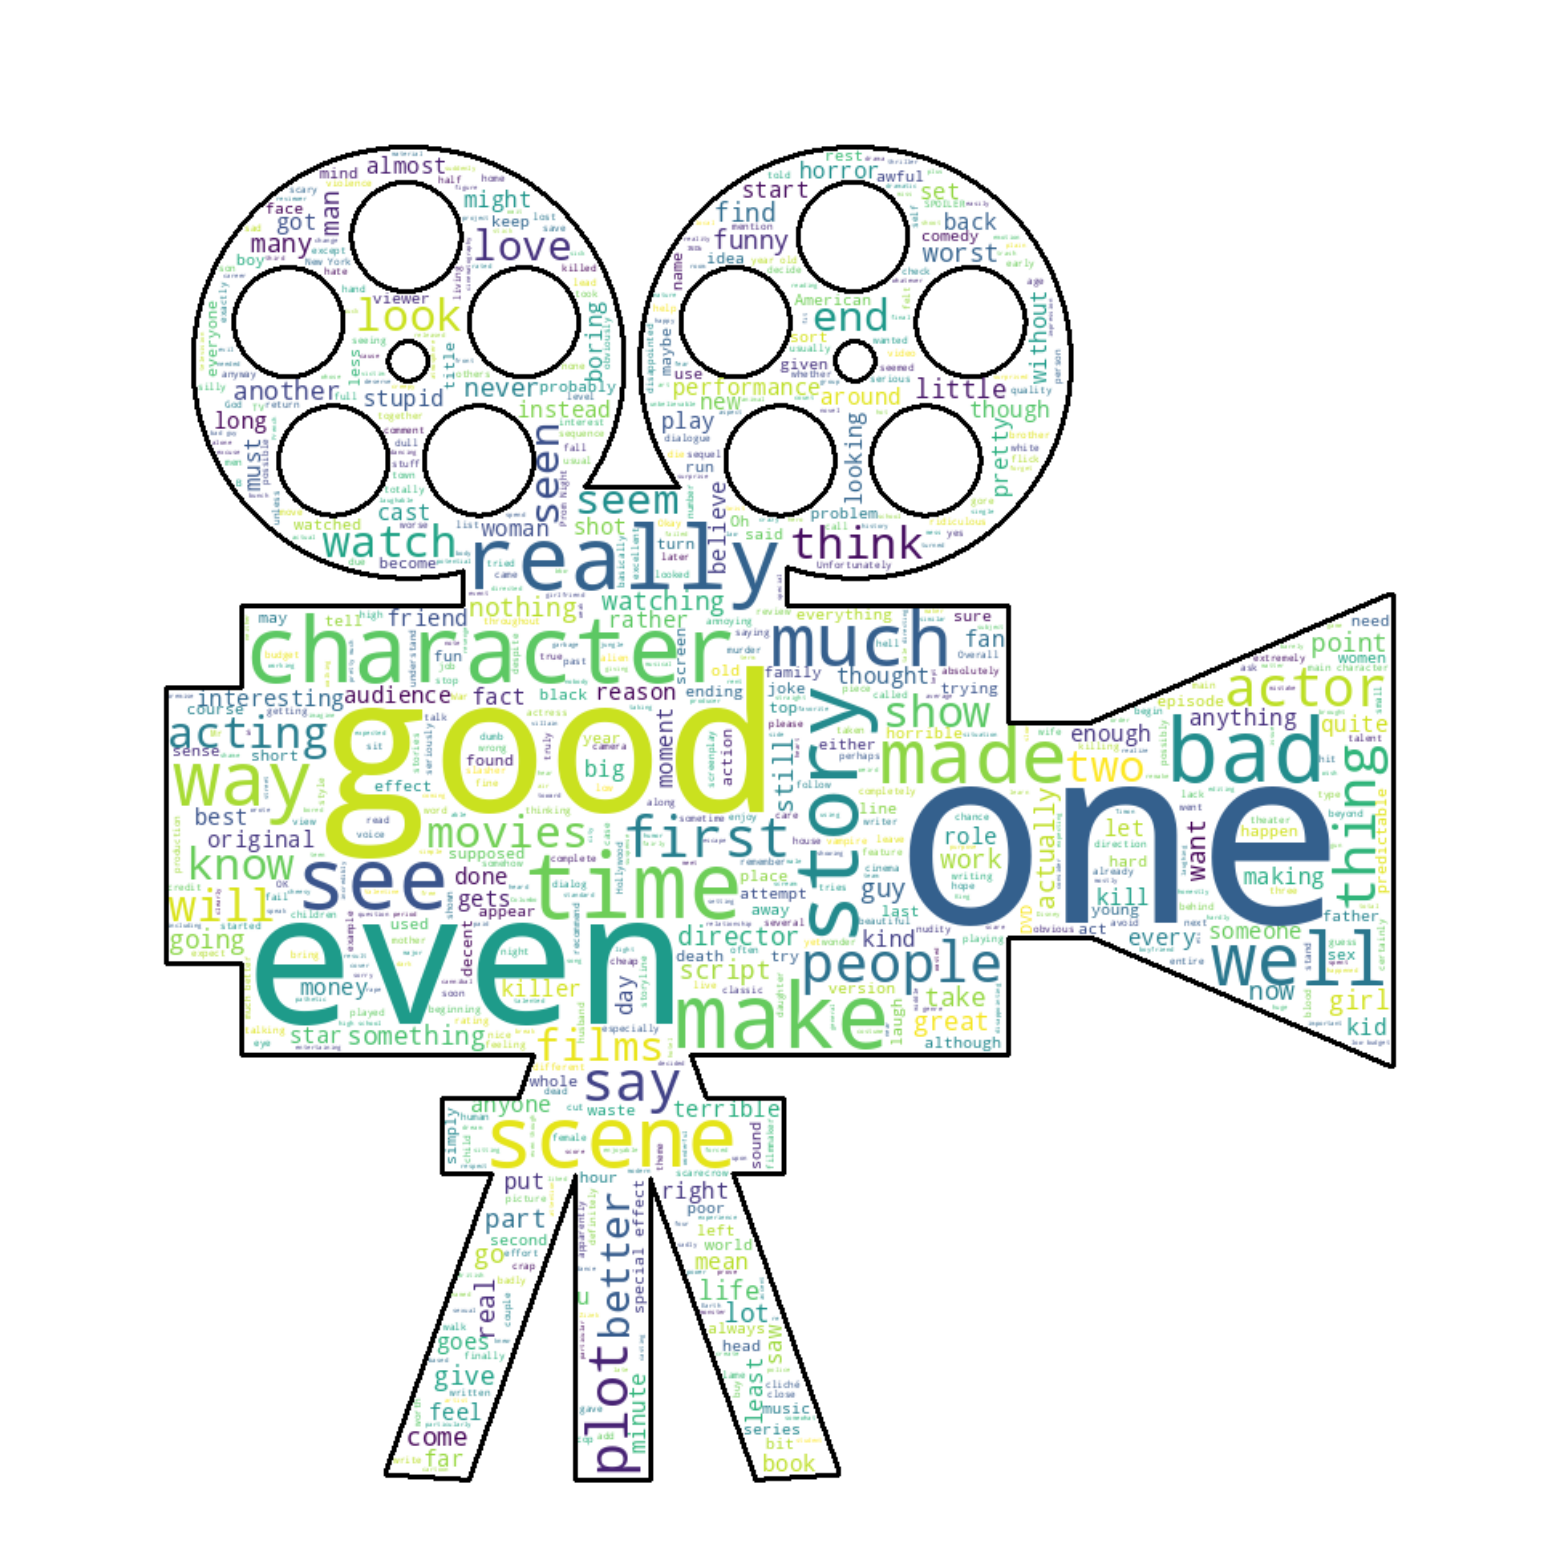

In [21]:
## Generate a new wordcloud with all the custom elements described earlier, as well as a border and a mask
wordcloud_proj = WordCloud(stopwords=newStopwords, background_color="white", contour_width=2, contour_color="black", max_words=3000, mask=mask).generate(data)

## Plot the wordcloud using matplotlib
plt.figure(figsize=[20,20])
plt.imshow(wordcloud_proj, interpolation="bilinear")
plt.axis("off")

##Lets save the image...
plt.savefig("imdbReviews.png", format="png")

## ... as well as showing it off!
plt.show()

## Generating a word tree

A word tree places a tree structure onto the words that follow a particular search term, and uses that structure to arrange those words spatially. A web example of this can be found [here](https://www.jasondavies.com/wordtree/), based on the paper [here](http://hint.fm/papers/wordtree_final2.pdf). In this lab, we are going to be building our own example from scratch. First, we will generate a word tree (then transform this into a connected word graph).

We are going to use a Python package called [NetworkX](https://networkx.org/documentation/stable/index.html). This is a package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

First we need to install the additional library.

### Setup graph library

In [22]:
# %pip install networkx

import networkx as nx

### Setup our data and key variables

We are going to use the text from Green Eggs and Ham, a children's book by Dr. Seuss, first published on August 12, 1960. The vocabulary of the text consists of just 50 words, some of which e.g. **am** will be in our stopwords. There are 191 lines in the txt file.

The text starts with the word **I** and so we will set that as the root in our tree. We can also set a depth as the number of words to look at from the root. We load in the data and scroll through a range of lines (in this case the full 191), splitting the strings and appending the individual words to a tree data list. We also set the colour map. 

In [23]:
root = 'I' ## The word to look at

f = open("green_eggs.txt", "r")
txtdata = f.readlines() 

## treeData will be used to store the raw data
treeData = []
for i in range(0, 191):
    for j in txtdata[i].split():
        treeData.append(j)

## The colours we will be using for the tree
colourMap = ['red', 'orange', 'yellow', 'green', 'turquoise', 'blue', 'purple', 'violet', 'pink']

## Print the raw data
print(treeData)

['I', 'am', 'Sam', 'Sam', 'I', 'am', 'That', 'Sam-I-am', 'That', 'Sam-I-am!', 'I', 'do', 'not', 'like', 'that', 'Sam-I-am', 'Do', 'you', 'like', 'green', 'eggs', 'and', 'ham', 'I', 'do', 'not', 'like', 'them,', 'Sam-I-am.', 'I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham.', 'Would', 'you', 'like', 'them', 'Here', 'or', 'there?', 'I', 'would', 'not', 'like', 'them', 'here', 'or', 'there.', 'I', 'would', 'not', 'like', 'them', 'anywhere.', 'I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham.', 'I', 'do', 'not', 'like', 'them,', 'Sam-I-am', 'Would', 'you', 'like', 'them', 'in', 'a', 'house?', 'Would', 'you', 'like', 'them', 'with', 'a', 'mouse?', 'I', 'do', 'not', 'like', 'them', 'in', 'a', 'house.', 'I', 'do', 'not', 'like', 'them', 'with', 'a', 'mouse.', 'I', 'do', 'not', 'like', 'them', 'here', 'or', 'there.', 'I', 'do', 'not', 'like', 'them', 'anywhere.', 'I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham.', 'I', 'do', 'not', 'like', 'them,', 'Sam-I-am.', 'Would', 'you',

### Sanitise our data

We could sanitise the text by removing the stopwords, but given the text, this might be a time where we choose not to.

In [24]:
## Loop through all the stop words and remove them from the raw data
for stop in newStopwords:
    while treeData.count(stop) != 0:
        treeData.remove(stop)

## Print out the sanitised data
print(treeData)

['I', 'Sam', 'Sam', 'I', 'That', 'Sam-I-am', 'That', 'Sam-I-am!', 'I', 'Sam-I-am', 'Do', 'green', 'eggs', 'ham', 'I', 'them,', 'Sam-I-am.', 'I', 'green', 'eggs', 'ham.', 'Would', 'Here', 'there?', 'I', 'there.', 'I', 'anywhere.', 'I', 'green', 'eggs', 'ham.', 'I', 'them,', 'Sam-I-am', 'Would', 'house?', 'Would', 'mouse?', 'I', 'house.', 'I', 'mouse.', 'I', 'there.', 'I', 'anywhere.', 'I', 'green', 'eggs', 'ham.', 'I', 'them,', 'Sam-I-am.', 'Would', 'eat', 'box?', 'Would', 'eat', 'fox?', 'Not', 'box.', 'Not', 'fox.', 'Not', 'house.', 'Not', 'mouse.', 'I', 'eat', 'there.', 'I', 'eat', 'anywhere.', 'I', 'eat', 'green', 'eggs', 'ham.', 'I', 'them,', 'Sam-I-am.', 'Would', 'you?', 'Could', 'you?', 'car?', 'Eat', 'them!', 'Eat', 'them!', 'Here', 'are.', 'I', ',', 'not,', 'car', 'You', 'may', 'them.', 'You', 'will', 'see.', 'You', 'may', 'tree?', 'd', 'tree.', 'I', 'not,', 'tree.', 'Not', 'car!', 'You', 'let', 'be.', 'I', 'box.', 'I', 'fox', 'I', 'house', 'I', 'mot', 'mouse', 'I', 'there.', 'I

### Starting our graph/tree

We are going to create a directed graph using DiGraph. DiGraph stores nodes and directed edges with optional data, or attributes.

We start by adding the *root* as our first node. We set a colour array for the graph and draw the node.

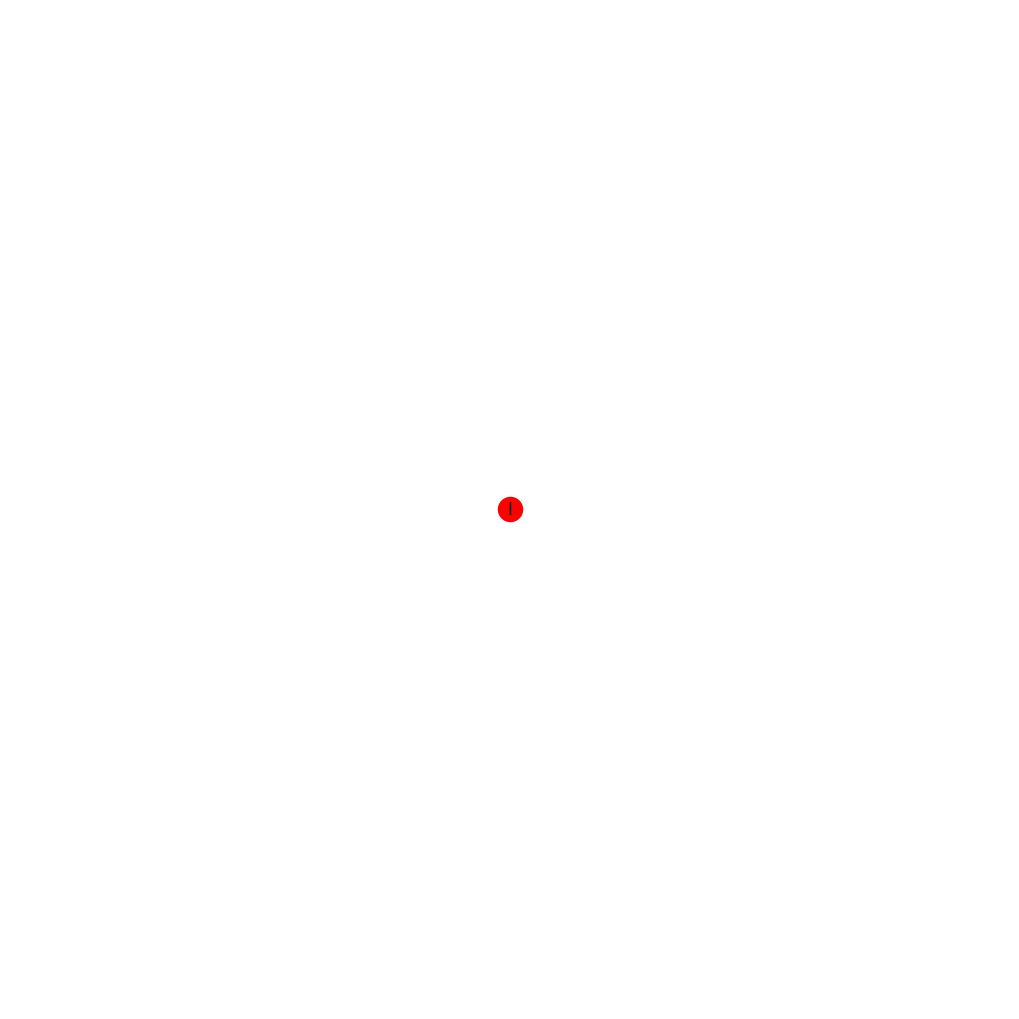

In [25]:
## Create a graph object and add our root node
G = nx.DiGraph()
G.add_node(root, color=colourMap[0])

## Assign a colour array that will be used when drawing the graph
colours = []
for i in G.nodes():
    colours.append(G.nodes[i]['color'])

## Draw and plot the graph
plt.figure(figsize=[10,10])
nx.draw(G, node_color=colours, with_labels=True)
plt.show()

### Build up tree data structure

We now need to work through each of the items in treeData. If the item is a root node (in this case **I**), we start a new item in `newTreeData` and add the following 5 (depth) words.

We end up with a list of items in `newTreeData`, with each item starting with **I** and containing the words that follow the root to a depth of 5. Try playing with the depth.

In [26]:
## Build a list from each root node
newTreeData = []
counter = 0
depth = 5 #The number words to look forward from the root

for i in range(0, len(treeData)):
    ## If it is a root node, start a new list
    if root == treeData[i]:
        counter = counter + 1
        newTreeData.append([])
    ## Add it to each of the lists, assuming that a sublist has been created, and we are nto already past the depth required
    if counter > 0:
        for j in range(0, counter):
            if len(newTreeData[j]) < depth:
                newTreeData[j].append(treeData[i])

print(newTreeData)

[['I', 'Sam', 'Sam', 'I', 'That'], ['I', 'That', 'Sam-I-am', 'That', 'Sam-I-am!'], ['I', 'Sam-I-am', 'Do', 'green', 'eggs'], ['I', 'them,', 'Sam-I-am.', 'I', 'green'], ['I', 'green', 'eggs', 'ham.', 'Would'], ['I', 'there.', 'I', 'anywhere.', 'I'], ['I', 'anywhere.', 'I', 'green', 'eggs'], ['I', 'green', 'eggs', 'ham.', 'I'], ['I', 'them,', 'Sam-I-am', 'Would', 'house?'], ['I', 'house.', 'I', 'mouse.', 'I'], ['I', 'mouse.', 'I', 'there.', 'I'], ['I', 'there.', 'I', 'anywhere.', 'I'], ['I', 'anywhere.', 'I', 'green', 'eggs'], ['I', 'green', 'eggs', 'ham.', 'I'], ['I', 'them,', 'Sam-I-am.', 'Would', 'eat'], ['I', 'eat', 'there.', 'I', 'eat'], ['I', 'eat', 'anywhere.', 'I', 'eat'], ['I', 'eat', 'green', 'eggs', 'ham.'], ['I', 'them,', 'Sam-I-am.', 'Would', 'you?'], ['I', ',', 'not,', 'car', 'You'], ['I', 'not,', 'tree.', 'Not', 'car!'], ['I', 'box.', 'I', 'fox', 'I'], ['I', 'fox', 'I', 'house', 'I'], ['I', 'house', 'I', 'mot', 'mouse'], ['I', 'mot', 'mouse', 'I', 'there.'], ['I', 'there.'

### Building nodes and edges

We now need to add nodes to our graph using `newTreeData`.

We work through each item in `newTreeData` and for each word we check if there that word appears in values, and if doesn't we append the word and the previous one to values.

We then work through values adding nodes with a colour and edges to our graph, before drawing the graph.

Networkx has a number of layouts that it will draw - see https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

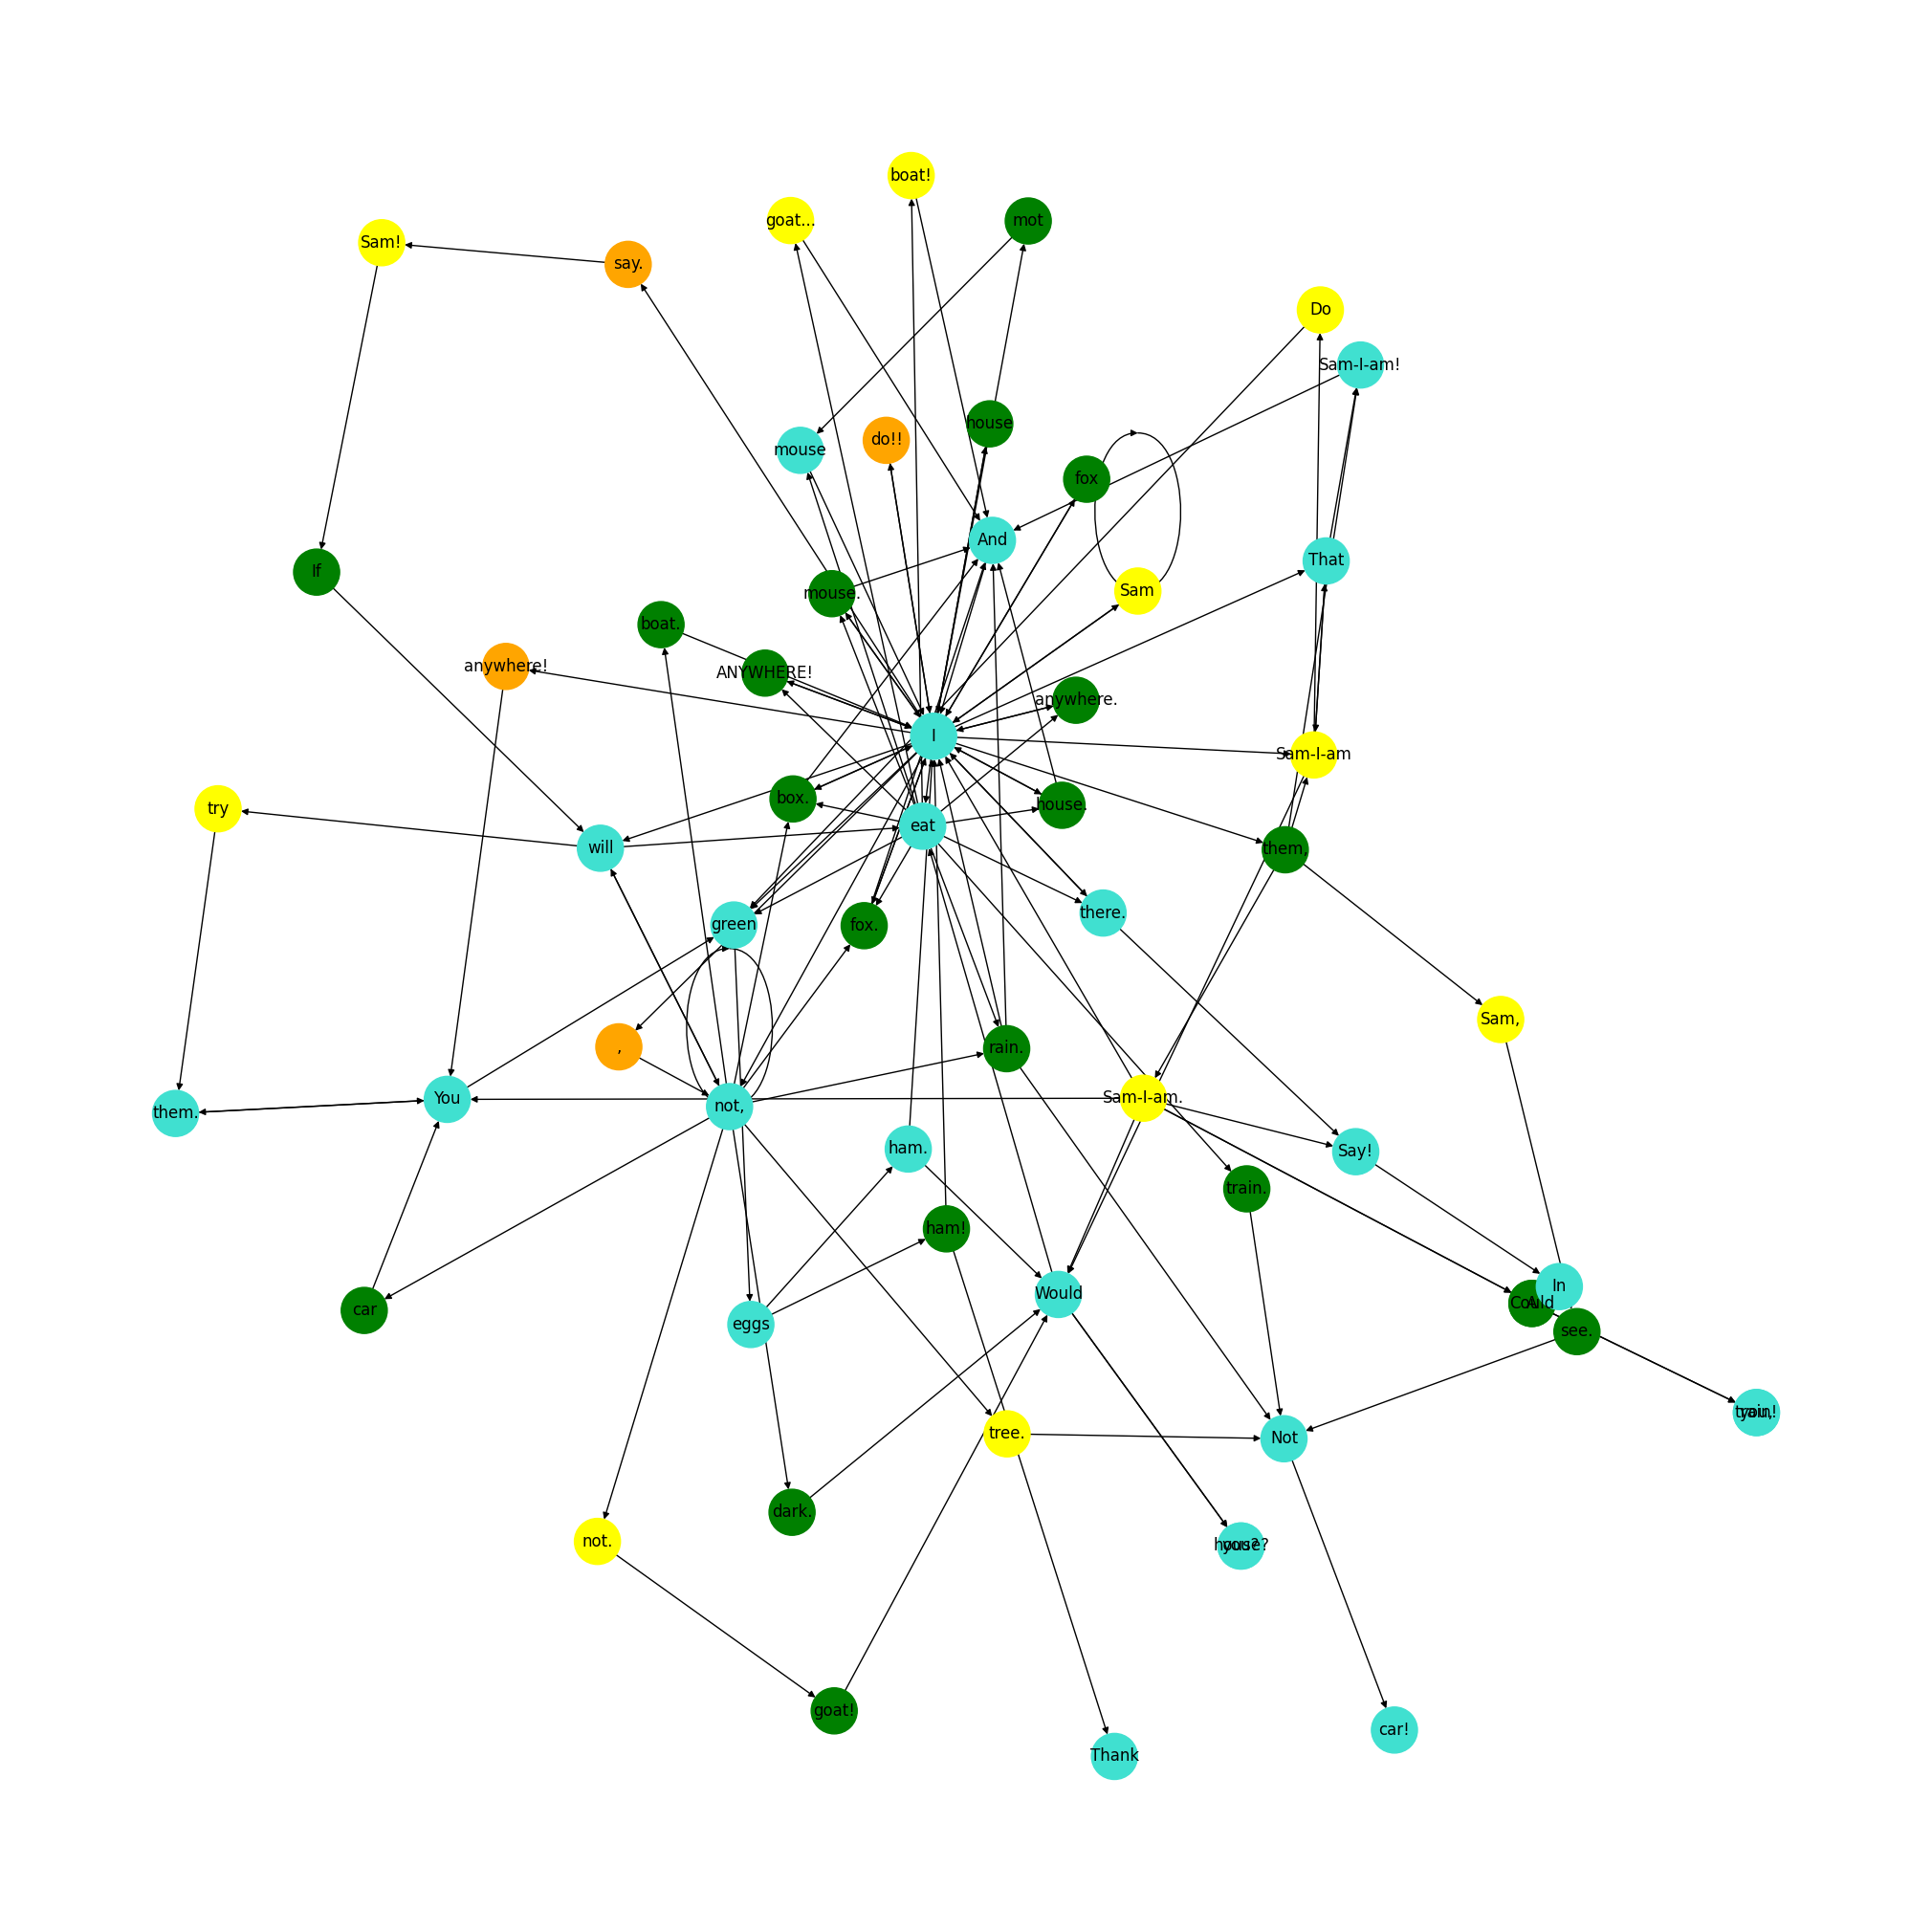

In [28]:
## If we have some data to present, then add the nodes and edges...
if len(newTreeData) != 0:
    for j in range(1, len(newTreeData[0])):
        if j >= depth:
            break
        values = []
        for i in range(0, len(newTreeData)):
            if j > len(newTreeData[i]):
                break
            if not values.__contains__(newTreeData[i][j]):
                values.append({'current':newTreeData[i][j], 'prev':newTreeData[i][j-1]})
        for i in values:
            # print("'" + i['prev'] + "' ---> '" + i['current'] + "': Depth: " + str(j))
            G.add_node(i['current'], color=colourMap[j])
            G.add_edge(i['prev'], i['current'])

    ## Get the list of colours sorted
    colours = []
    for i in G.nodes():
        colours.append(G.nodes[i]['color'])

    ## Draw and print the tree
    plt.figure(figsize=[20,20])
    nx.draw_kamada_kawai(G, node_color=colours, with_labels=True, node_size=1200)
    plt.show()
else: ## Print out a message saying that there is nothing to display
    print("No data could be presented... try something else")

## Exercises
### Exercise 1 - Word Clouds

The marketing department for IMDb loved the original word cloud image produced, and want to commission you to produce a visualisation using more data. They would like to use a different image, and some different colours including yellows, oranges and reds. Using the techniques, generate a new word cloud with the following parameters:
  * A new image should be used
  * The background should be ```None``` (as they want a clear background so they can set there own background)
  * The colour palette should be predominately yellow, orange and/or red (more colours = more points)
  * The outline should be white (it will be used on a dark background)
  * The unsupervised data set should be used to generate it
  * Make it look as cool as possible (more cool = more points)

*Note: no points will actually be awarded...*

In [29]:
## Exercise 1 code here! ##

### Exercise 2 - Word Trees & Graphs

Explore the word tree algorithm with more data, different key words and different lengths, including:
  * What happens if you double the data?
  * What happens if you use a larger/smaller root?
  * What happens if you increase the depth (don't forget to extend the colour map!)?
  * What happens if you draw the same graph in different ways? For example:
    * `draw_planar`
    * `draw_circular`
    * `draw_shell`
    * `draw_spectral`
    * `draw_spring`
    * etc...

In [30]:
## Exercise 2 code here! ##

### Exercise 3
[**Engadget**](https://www.engadget.com/) is a tech website that aggregates and writes news articles about the tech industry. Wouldn't it be cool if we could generate a visualisation for the recent articles abstracts...

Using the `engadget_articles` created by the following code block, generate a visualisation which is as pleasing as possible. It should relate to the website where possible.

In [31]:
%pip install lxml beautifulsoup4 pandas requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re

## Collect the raw data
url = 'https://www.engadget.com/rss.xml'
page = requests.get(url)
soup = BeautifulSoup(page.text, "xml") ## The RSS feed uses XML, so we need to install and use an XML parser
results = soup.find_all("item") ## Find all the articles using the techniques in Lab 2

engadget_articles = []

## Generate a list of article abstracts, removing any unnecessary whitespace and HTML tags
for item in results:
    article = item.find("description").text.strip()
    article = re.sub(r'<.*?>', '', article)
    engadget_articles.append(article)

#engadget_articles

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 4.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
## Exercise 3 code here! ##

### Exercise 4: Arranging Networks
Sometimes your graph may not present in the layout you would like, for example there may be lots of overlapping nodes and titles that make it difficult to interpret.

a) Using the coordinate system in networkx, see if you can write your name using nodes and edges.

b) Change the colour of the nodes so each letter is a different colour.

In [ ]:
#Code here

### Premier League Transfers

We are going to visualise all player transfers between Premier League clubs in a time duration of your choosing.

a) Fetch the data from this repository https://github.com/ewenme/transfers/blob/master/data/premier-league.csv and load it into a pandas dataframe.

b) Restrict the data to contain transfers from a given time period (Starting with 1 year may be easier to visualise).

c) Restrict the data to only contain transfers between Premier League Clubs (Hint: You can get a list of Premier League teams using the items in the club_name column.)

d) Visualise these transfers as a network so that the following attributes can be observed effectively:

- The fee involved with each transfer (Make sure to represent free transfers and loans effectively)

- Which clubs were involved with the transfer
    
- Direction of transfer (which club was source and which was target)



In [ ]:
# Code here

### Extension

Create some more visualisations from the transfer data. What are some interesting insights that can be drawn which would not be easily seen without your visualisation?

In [ ]:
# Code here